In [1]:
# ---Mengimport library yang dibutuhkan---
import pandas as pd
from pymongo import MongoClient
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set_palette("pastel")
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# --- 1. Koneksi ke MongoDB ---
client = MongoClient("mongodb://localhost:27017/")
db = client["staff_db"]
df = pd.DataFrame(list(db["cleaned_data"].find()))

# --- 2. Bersihkan Data ---
if '_id' in df.columns:
    df.drop('_id', axis=1, inplace=True)

df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,3,1,1,1,3,28,3,5,0,0,85,1
1,5,1,0,0,1,58,4,25,1,0,67,1
2,2,1,0,1,1,22,3,3,1,0,83,1
3,0,1,1,1,1,29,3,6,1,0,94,1
4,0,0,1,1,1,35,5,10,1,0,47,1


In [3]:
# --- 3. Visualisasi Data ---
promo = pd.DataFrame(df.is_promoted.value_counts())
promo.columns = ["Promoted"]
promo["Values"] = promo.index
promo["Values"] = promo["Values"].map({0: "Not Promoted", 1: "Promoted"})

fig = px.pie(
    promo,
    values="Promoted",
    names="Values",
    title="Promoted Employees",
    color_discrete_sequence=px.colors.qualitative.Pastel2
)

fig.update_layout(autosize=False, width=1000, height=500)
fig.show()

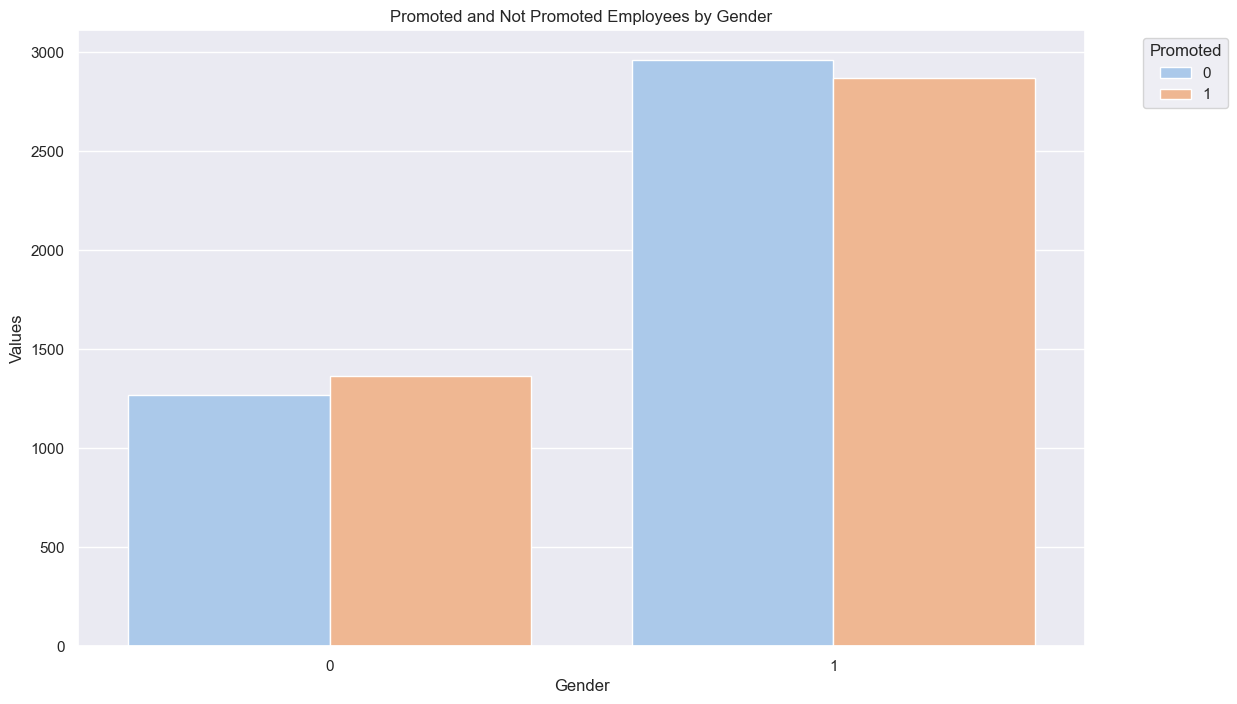

In [4]:
# --- 4. Visualisasi Promosi berdasarkan Jenis Kelamin ---
gender = pd.DataFrame(df.groupby("is_promoted").gender.value_counts().reset_index(name='Values'))

plt.figure(figsize=(13, 8))
sns.barplot(x='gender', y='Values', data=gender, hue='is_promoted')
plt.title("Promoted and Not Promoted Employees by Gender")
plt.legend(title='Promoted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.show()

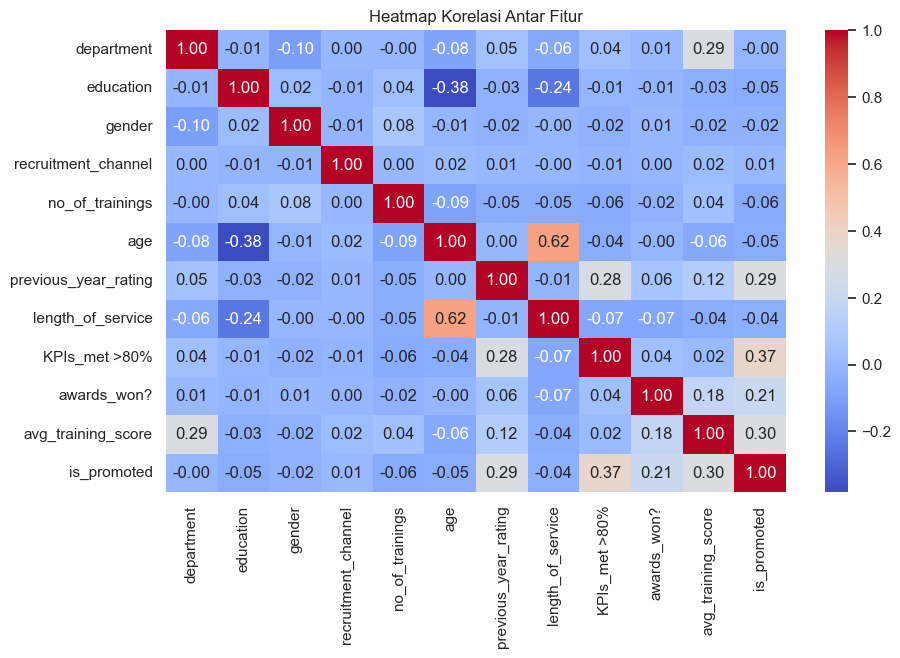

In [5]:
# --- 5. Visualisasi Heatmap Korelasi Antar Fitur ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()